In [1]:
import pandas as pd
from data_preprocessing import data_preprocessing
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Pre-processing & EDA

In [2]:
def data_preprocessing():
    supply_data = pd.read_csv('dataset/supply_data.csv')
    demand_data = pd.read_csv('dataset/demand_data.csv')
    CSUSHPISA =  pd.read_csv('dataset/CSUSHPISA.csv')
    #changing the dates to one common format to merge the datasets
    demand_data['DATE'] = pd.to_datetime(demand_data['DATE'])
    supply_data['Period'] = pd.to_datetime(supply_data['Period'],format='%d-%m-%Y')
    supply_data.rename(columns={'Period': 'DATE'}, inplace=True)
    CSUSHPISA['DATE'] = pd.to_datetime(CSUSHPISA['DATE'])
    merged_data = pd.merge(supply_data,demand_data)
    merged_data = merged_data.merge(CSUSHPISA)
    merged_data = merged_data.drop(['HPI','Unnamed: 0'], axis=1)
    return merged_data

In [11]:
#checking for null values
data = data_preprocessing()
data.dropna(inplace=True)
data.isnull()

,DATE,Permit_Number,construction,Homes_Sold,Housing_Starts,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,CSUSHPISA
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
79,False,False,False,False,False,False,False,False,False,False
80,False,False,False,False,False,False,False,False,False,False
81,False,False,False,False,False,False,False,False,False,False
82,False,False,False,False,False,False,False,False,False,False


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

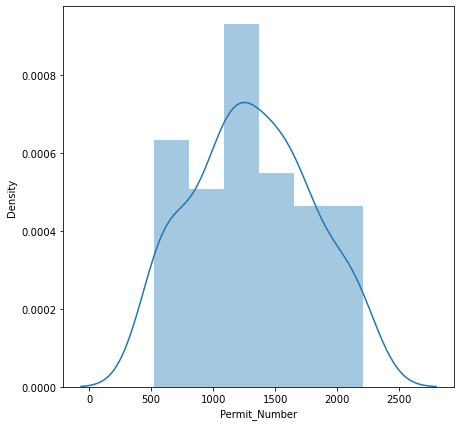

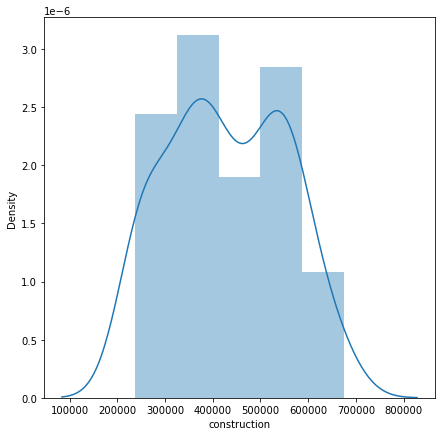

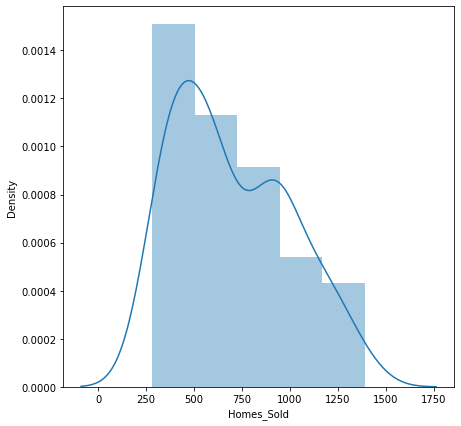

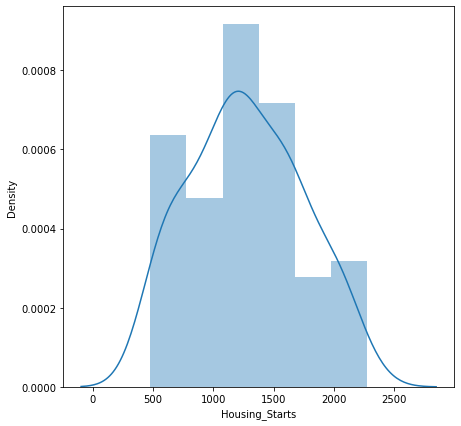

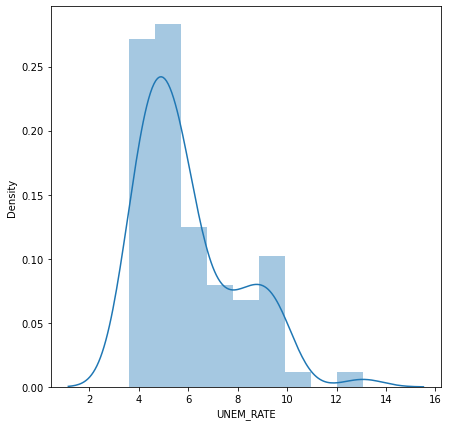

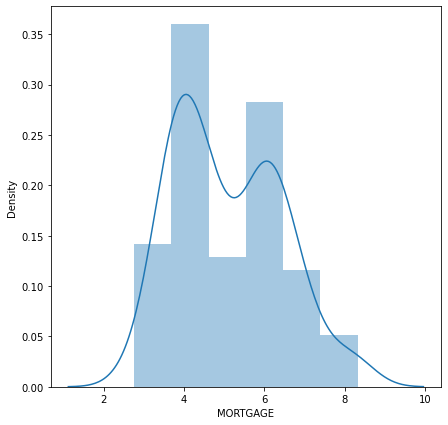

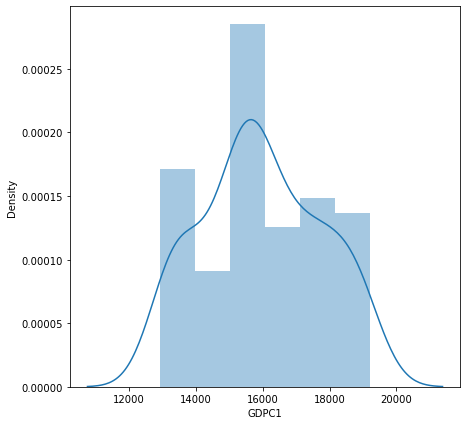

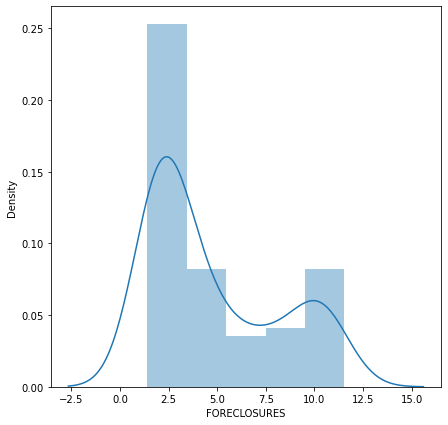

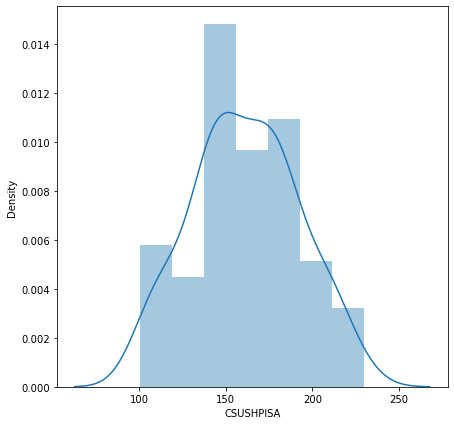

In [4]:
#These plots describe how the data for each feature(Homes sold, Housing starts,etc) is skewed or distributed
num_data = data.select_dtypes(include=['int64', 'float64']).columns
for feature in num_data:
  plt.figure(figsize=(7,7))
  sns.distplot(data[feature],kde=True)

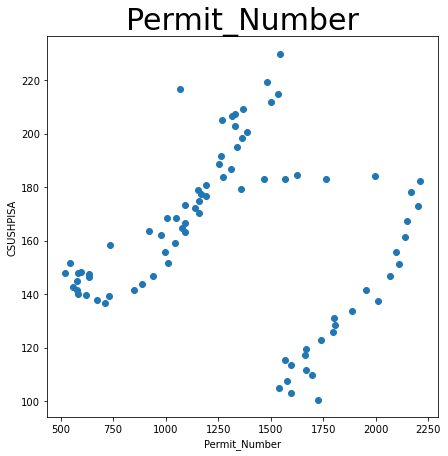

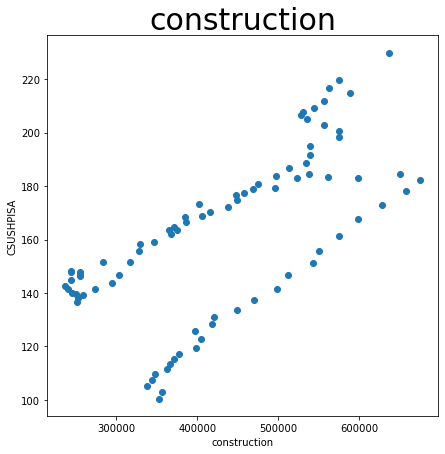

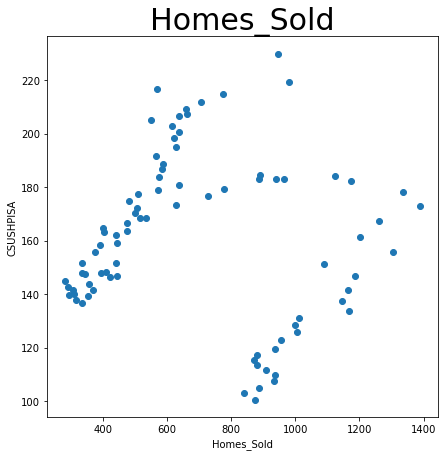

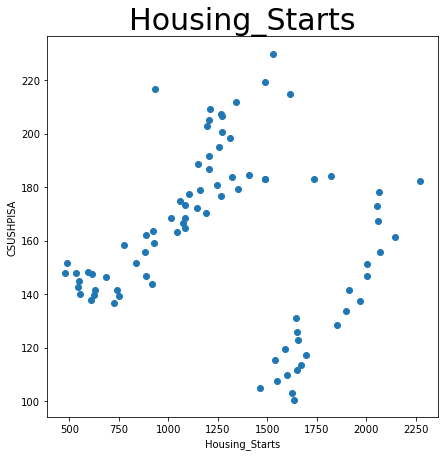

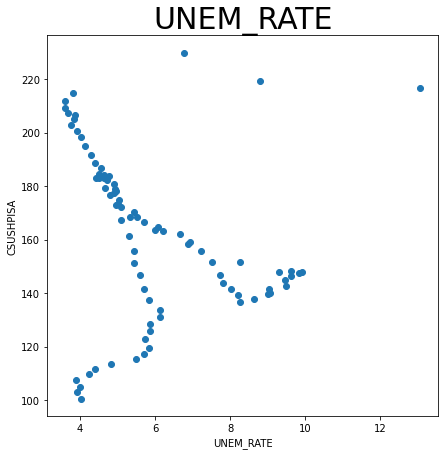

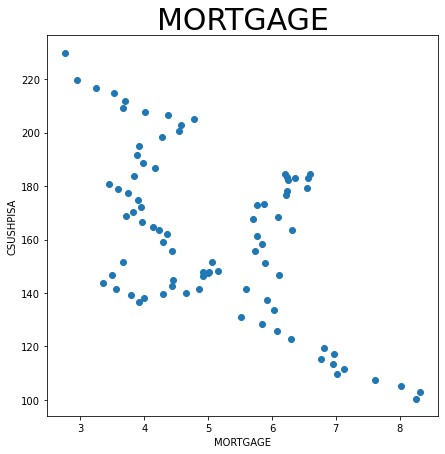

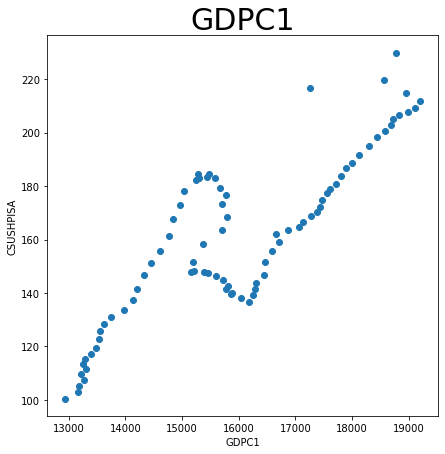

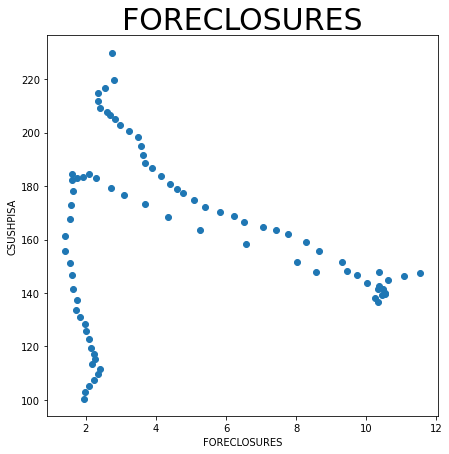

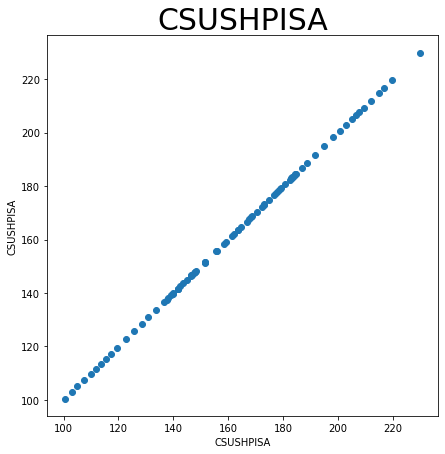

In [5]:
#These plots describe the change in CSUSHPISA with respect to each individual feature
for feature in num_data:
  plt.figure(figsize=(7,7))
  plt.scatter(x=feature,y='CSUSHPISA',data=data)
  plt.xlabel(feature)
  plt.ylabel("CSUSHPISA")
  plt.title(feature,fontsize=30)

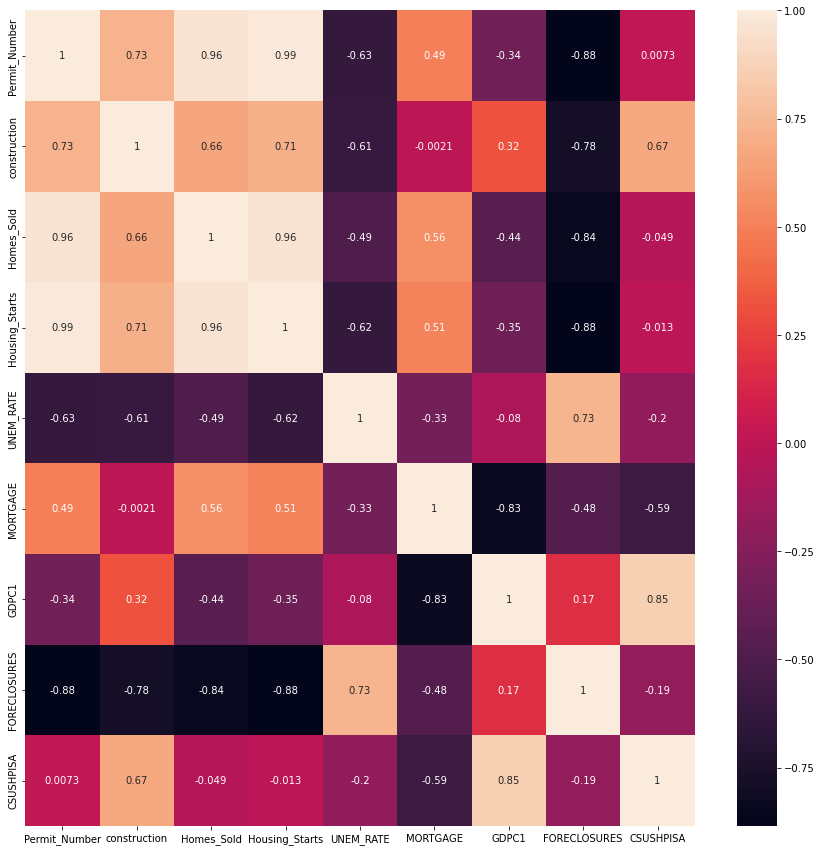

In [6]:
#this is a heatmap which helps us understand the correlation between the features 
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)
plt.show()

## Building Lasso Regression model

In [33]:
def model_building():
    # print(data.dtypes)
    x = data.drop('CSUSHPISA', axis=1)
    #setting target variable
    y = data['CSUSHPISA']
    
    #training our model
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
    X_numeric = X_train[numeric_columns]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_numeric)
    X_test_scaled = scaler.transform(X_test[numeric_columns])  # Scale the testing set

    alpha = 1
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, Y_train)
    
    y_pred = lasso.predict(X_test_scaled)

    print(y_pred,"YPRED")
    print(Y_test,"YTEST")
    
    #calculating mse and r2 score to evaluate the predictions of our model
    mse = mean_squared_error(Y_test, y_pred)
    r2 = r2_score(Y_test, y_pred)
    
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    years = pd.to_datetime(data['DATE']).dt.year

    # Plot the predicted CSUSHPISA values over the years
    plt.figure(figsize=(12, 6))
    plt.plot(years[-len(y_test):], y_pred, label='Predicted CSUSHPISA', linestyle='-', color='b')
    plt.xlabel('Year')
    plt.ylabel('Predicted CSUSHPISA')
    plt.title('Predicted CSUSHPISA Over the Years')
    plt.grid(True)
    plt.legend()
    plt.show()
    return y_test, y_pred


[207.81377848 112.56969354 164.97143866 172.53656976 129.72196933
 199.0892958  128.39519125 155.01489702 115.09477816 184.29157044
 140.54849377 144.31431205 147.23257066 207.1941248  159.6629092
 156.51061791 155.49070337] YPRED
73    200.655
0     100.551
58    164.576
22    172.859
12    128.460
70    191.454
10    122.887
18    151.338
4     109.846
65    178.768
40    147.395
47    137.953
35    158.326
81    216.809
55    159.242
54    155.604
33    168.338
Name: CSUSHPISA, dtype: float64 YTEST
Mean Squared Error: 48.62765176543624
R-squared: 0.9465436502403239


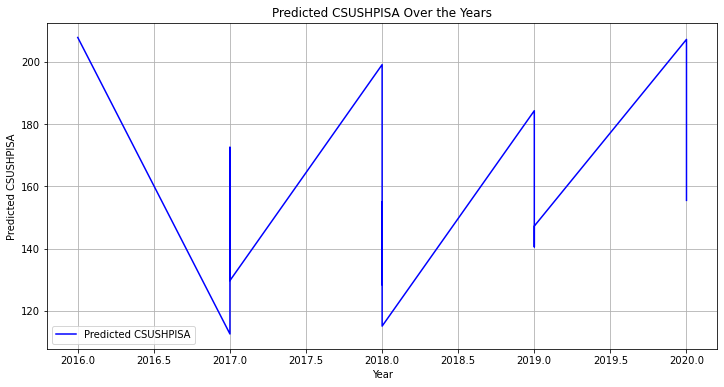

In [34]:
Y_test,y_pred = model_building()

## Model Analytics

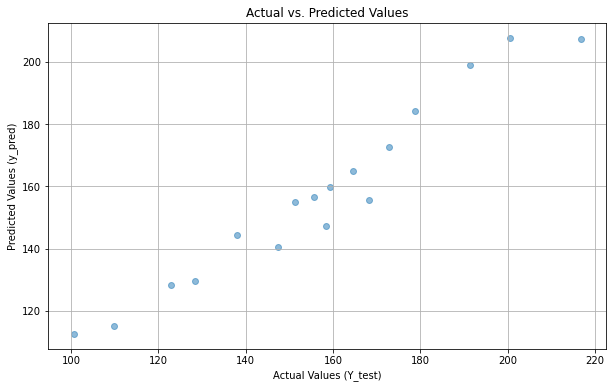

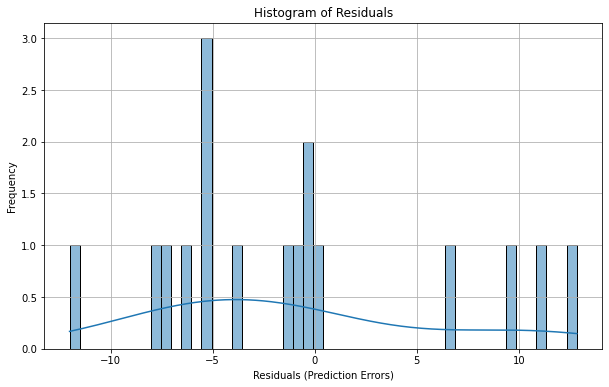

In [32]:
#This plot shows the difference between the actual values of CSUSHPISA vs the values predicted by our model
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values (Y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")
plt.grid(True)
plt.show()

#this histogram tells us about the frequency of errors
residuals = Y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel("Residuals (Prediction Errors)")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.grid(True)
plt.show()

